In [425]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.algorithms import community as cm
import random
import pygraphviz
from pyvis.network import Network

### Modularidade



Uma das características de uma comunidade é que os vértices de uma dada comunidade devem ter uma tendência para uma maior número de ligações com outros membros da mesma comunidade que com membros de outras comunidades.

Uma boa medida de detecção de comunidades seria mensurar quão maior é o número de ligações internas entre membros de uma mesma comunidade em relação a uma rede gerada aleatoriamente.

Modularidade é equivalente ao coeficiente de assortatividade não normalizado para atributos categóricos, sendo que aqui os atributos categóricos identificam as comunidades aos quais os nós pertencem.

A modularidade de uma rede pode ser obtida se usando método **modularity()** do **networkx**.

O cálculo de modularidade é um problema muito complexo, assim heurísticas são usadas para o cálculo de modularidade de uma rede.
- algoritmo de **Clauset-Newman-Moore** 
- algoritmo de **Louvain**

**Algoritmo Clauset-Newman-Moore**

- Inicialmente é formado uma comunidade para cada vértice.
- Em cada passo, agregam-se duas comunidades cujo agrupamento produza o maior aumento do coeficiente de modularidade. 

Este algoritmo está implementado no método **greedy_modularity_communities()** do **networkx**.

**Algoritmo de Louvain**

Fase 1:

- Forma-se uma comunidade com cada vértice. 
- Para cada vértice, o algoritmo avalia o aumento de modularidade pela mudança para uma comunidade vizinha, até  que a mudança de vértices não produza aumento da modularidade.

Fase 2:
- Cada comunidade resultante da fase anterior é representada por um vértice no novo grafo.
- Agrega-se uma aresta entre dois vértices se as correspondentes comunidades estiverem ligadas. 
- O peso da aresta é igual à soma dos pesos das arestas que ligaram as comunidades na fase prévia.
- Arestas dentro de uma comunidade são representadas por um laço com peso igual à soma dos pesos das arestas originais.

As fases 1 e 2 são executadas até que nenhum nó na rede resultante mude para uma comunidade vizinha.

Este algoritmo está implementado no método **louvain_communities()** do **networkx**.

### Exemplo
Considere o grafo do Karate Clube

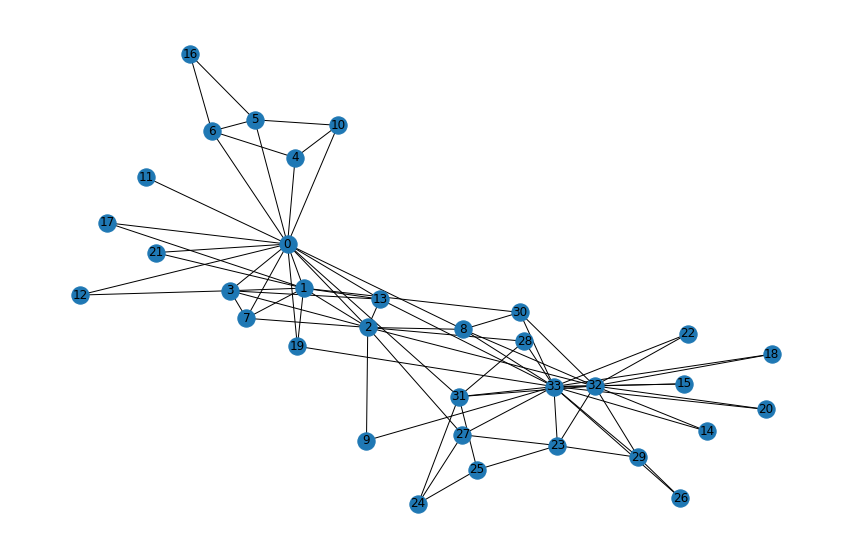

In [476]:
KCG = nx.karate_club_graph()
fig, ax = plt.subplots(1,1,figsize=(15,10))
nx.draw(KCG, with_labels=True)

Encontrando comunidades usando o método **louvain_communities**

In [477]:
louvain_comm = cm.louvain_communities(KCG, seed=123)
print(f"#comunidades: {len(louvain_comm)}")

for it in louvain_comm:
    print(f"{sorted(it)}")

#comunidades: 4
[1, 2, 3, 7, 12, 13]
[0, 4, 5, 6, 10, 11, 16, 17, 19, 21]
[23, 24, 25, 27, 28, 31]
[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]


Encontrando comunidades usando o método **greedy_modularity_communities**

In [478]:
cmn_comm = cm.greedy_modularity_communities(KCG)
print(f"#cmn_comm: {len(cmn_comm)}")
for it in cmn_comm:
    print(sorted(it))

#cmn_comm: 3
[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


Calculando o coeficiente de modularidade de cada comunidade

In [479]:
print(f"coef modularity louvain: {cm.modularity(KCG,louvain_comm)}")
print(f"coef modularity cmn: {cm.modularity(KCG,cmn_comm)}")

coef modularity louvain: 0.4276718952043627
coef modularity cmn: 0.41096493693896297


In [483]:
list_color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(louvain_comm))]
print(len(list_color))

4


In [484]:
louvain_color = []
for no in KCG.nodes():
    for k in range(len(louvain_comm)):
        if (no in louvain_comm[k]):
            louvain_color.append(list_color[k])

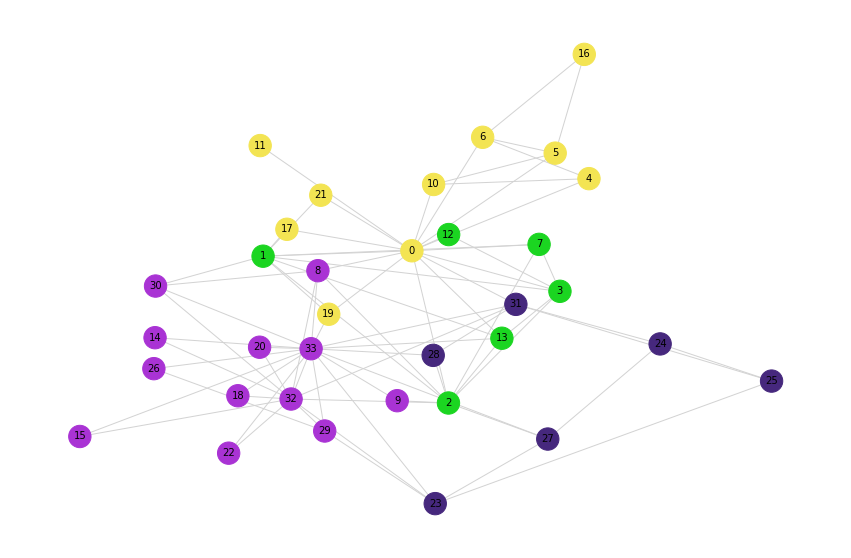

In [485]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

pos = nx.kamada_kawai_layout(KCG)

nx.draw_networkx(KCG,
                 pos=pos,
                 edge_color='lightgray',
                 node_size = 500,
                 with_labels=True,
                 #labels=etiquetas,
                 font_size=10, 
                 node_color=louvain_color
                 )

plt.box(False)
plt.show()

### Exemplo

Considere o exemplo da rede dos personagens do segundo livro da saga de Harry Potter.

In [438]:
atri = pd.read_csv('../../data/harrypotter/hpattributes.txt', sep='\t')
ares = pd.read_csv('../../data/harrypotter/hpbook2.txt', sep=' ', header=None)
nome = pd.read_csv('../../data/harrypotter/hpnames.txt', sep='\t')

In [439]:
gpotter = nx.DiGraph()

n = atri.shape[0]

for k in range(n):
    gpotter.add_node(k,
                     nome = nome['name'][k],
                     ano = atri['schoolyear'][k],
                     gen = atri['gender'][k],
                     casa = atri['house'][k])

for k in range(n):
    for m in range(n):
        if ares.values[k][m] == 1:
            gpotter.add_edge(k,m)

print(f"#nodes de G = {nx.number_of_nodes(gpotter)}")
print(f"#edges de G = {nx.number_of_edges(gpotter)}")

#nodes de G = 64
#edges de G = 110


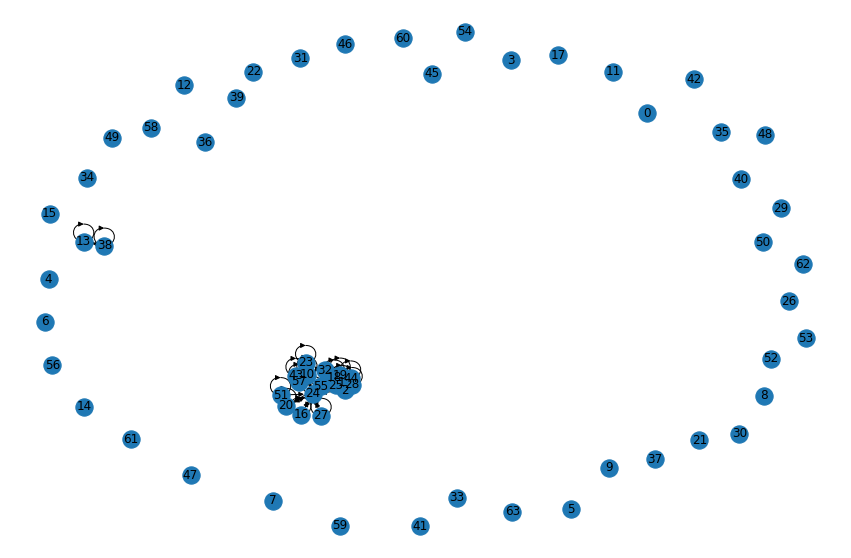

In [440]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(gpotter,with_labels=True)

In [441]:
louvain_comm = cm.louvain_communities(gpotter)
cmn_comm = cm.greedy_modularity_communities(gpotter, cutoff=len(louvain_comm))

tam_louvain_comm = len(louvain_comm)
tam_cmn_comm = len(cmn_comm)

coef_louvain_comm = cm.modularity(gpotter,louvain_comm)
coef_cmn_comm = cm.modularity(gpotter,cmn_comm)

In [ ]:
print(f"#tam louvain comm = {tam_louvain_comm}")
print(f"#tam cmn comm = {tam_cmn_comm}")

#tam louvain comm = 63
#tam cmn comm = 63


In [443]:
print(f"coef louvain mod = {coef_louvain_comm}")
print(f"coef cmn mod = {coef_cmn_comm}")

coef louvain mod = 0.12016528925619833
coef cmn mod = 0.12495867768595038


In [444]:
for it in louvain_comm:
    for k in it:
        print(f"{k}: {gpotter.nodes[k]['nome']}", end=", ")
    print()

0: Adrian Pucey, 
1: Alicia Spinnet, 
2: Angelina Johnson, 
3: Anthony Goldstein, 
4: Blaise Zabini, 
5: C. Warrington, 
6: Cedric Diggory, 
7: Cho Chang, 
8: Colin Creevey, 
9: Cormac McLaggen, 
10: Dean Thomas, 
11: Demelza Robins, 
12: Dennis Creevey, 
13: Draco Malfoy, 
14: Eddie Carmichael, 
15: Eleanor Branstone, 
16: Ernie Macmillan, 
17: Euan Abercrombie, 
32: Lee Jordan, 18: Fred Weasley, 
19: George Weasley, 
20: Ginny Weasley, 
21: Graham Pritchard, 
22: Gregory Goyle, 
23: Hannah Abbott, 
24: Harry James Potter, 
25: Hermione Granger, 
26: Jimmy Peakes, 
27: Justin Finch-Fletchley, 
28: Katie Bell, 
29: Kevin Whitby, 
30: Lavender Brown, 
31: Leanne, 
33: Lucian Bole, 
34: Luna Lovegood, 
35: Malcolm Baddock, 
36: Mandy Brocklehurst, 
37: Marcus Belby, 
38: Marcus Flint, 
39: Michael Corner, 
40: Miles Bletchley, 
41: Millicent Bulstrode, 
42: Natalie McDonald, 
43: Neville Longbottom, 
44: Oliver Wood, 
45: Orla Quirke, 
46: Owen Cauldwell, 
47: Padma Patil, 
48: Pansy Par

Definimos o mesmo número de comunidades geradas pelo algoritmo de **Louvain** no algoritmo de **Clauset-Newman-Moore** 

In [445]:
gpotter_copy = gpotter.copy()

# matriz de adjacencia esparsa
A = nx.to_scipy_sparse_array(gpotter)#.toarray()
A_copy = A.copy()

# eliminando os nos isolados
isolados = []
for k in range(n):
    if np.sum(A[[k],:]) == 0:
        isolados.append(k)
        gpotter.remove_node(k)

print(len(isolados), 'nos isolados.')

print(f"#nodes de G = {nx.number_of_nodes(gpotter)}")
print(f"#edges de G = {nx.number_of_edges(gpotter)}")

44 nos isolados.
#nodes de G = 20
#edges de G = 110


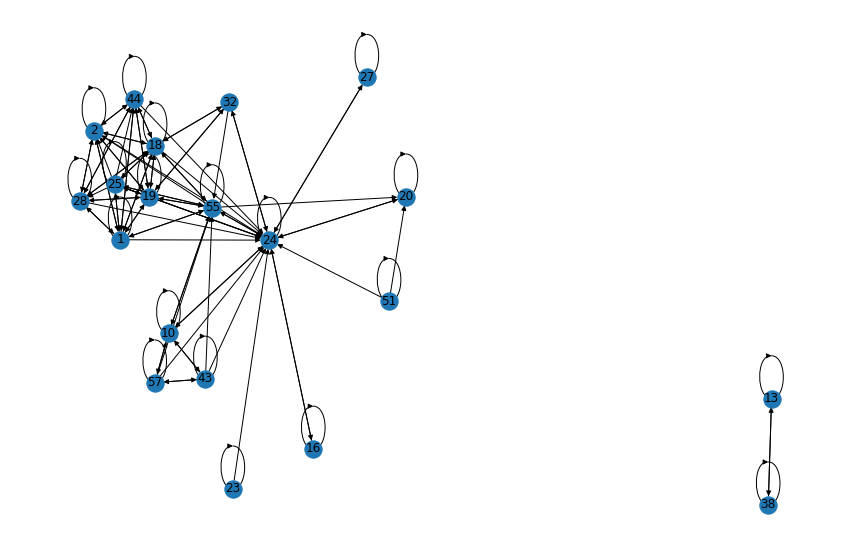

In [446]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(gpotter,with_labels=True)

Para comparar os resultados, no algoritmo de **Clauset-Newman-Moore** só salvamos o mesmo número de comunidades que as devolvidas pelo algoritmo de **Louvain**. 

In [447]:
louvain_comm = cm.louvain_communities(gpotter)
cmn_comm = cm.greedy_modularity_communities(gpotter, cutoff=len(louvain_comm))

tam_louvain_comm = len(louvain_comm)
tam_cmn_comm = len(cmn_comm)

coef_louvain_comm = cm.modularity(gpotter,louvain_comm)
coef_cmn_comm = cm.modularity(gpotter,cmn_comm)

In [448]:
print(f"tam louvain comm = {len(louvain_comm)}")
print(f"tam cmn comm = {len(cmn_comm)}")

tam louvain comm = 19
tam cmn comm = 19


In [449]:
print(f"coef mod louvain: {coef_louvain_comm}")
print(f"coef mod cmn: {coef_cmn_comm}")

coef mod louvain: 0.12016528925619833
coef mod cmn: 0.12495867768595038


In [450]:
for it in louvain_comm:
    for k in it:
        print(f"{k}: {gpotter.nodes[k]['nome']}", end=", ")
    print()

1: Alicia Spinnet, 
2: Angelina Johnson, 
10: Dean Thomas, 
13: Draco Malfoy, 
16: Ernie Macmillan, 
32: Lee Jordan, 18: Fred Weasley, 
19: George Weasley, 
20: Ginny Weasley, 
23: Hannah Abbott, 
24: Harry James Potter, 
25: Hermione Granger, 
27: Justin Finch-Fletchley, 
28: Katie Bell, 
38: Marcus Flint, 
43: Neville Longbottom, 
44: Oliver Wood, 
51: Percy Weasley, 
55: Ronald Weasley, 
57: Seamus Finnigan, 


In [451]:
for it in cmn_comm:
    for k in it:
        print(f"{k}: {gpotter.nodes[k]['nome']}", end=", ")
    print()

13: Draco Malfoy, 38: Marcus Flint, 
1: Alicia Spinnet, 
2: Angelina Johnson, 
10: Dean Thomas, 
16: Ernie Macmillan, 
18: Fred Weasley, 
19: George Weasley, 
20: Ginny Weasley, 
23: Hannah Abbott, 
24: Harry James Potter, 
25: Hermione Granger, 
27: Justin Finch-Fletchley, 
28: Katie Bell, 
32: Lee Jordan, 
43: Neville Longbottom, 
44: Oliver Wood, 
51: Percy Weasley, 
55: Ronald Weasley, 
57: Seamus Finnigan, 


In [452]:
list_louvain_color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(tam_louvain_comm)]
print(len(list_louvain_color))

19


In [453]:
list_cmn_color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(tam_cmn_comm)]
print(len(list_cmn_color))

19


In [454]:
louvain_color = []
for no in gpotter.nodes():
    for k in range(len(louvain_comm)):
        if (no in louvain_comm[k]):
            louvain_color.append(list_louvain_color[k])

In [455]:
cmn_color = []
for no in gpotter.nodes():
    for k in range(len(cmn_comm)):
        if (no in cmn_comm[k]):
            cmn_color.append(list_cmn_color[k])

In [ ]:
print(louvain_color)
print(cmn_color)

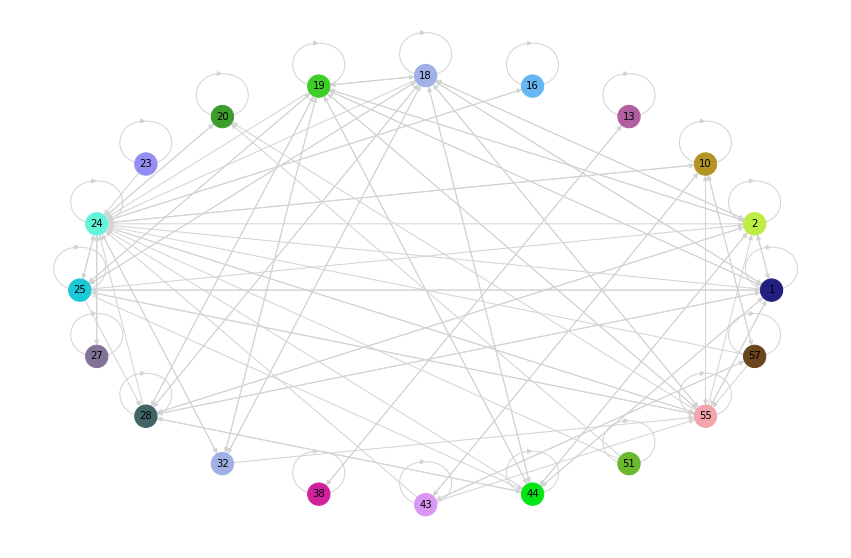

In [456]:
etiquetas = nx.get_node_attributes(gpotter, 'nome')

fig, ax = plt.subplots(1,1,figsize=(15,10))

pos = nx.circular_layout(gpotter)

nx.draw_networkx(gpotter,
                 pos=pos,
                 edge_color='lightgray',
                 node_size = 500,
                 with_labels=True,
                 #labels=etiquetas,
                 font_size=10, 
                 node_color=louvain_color
                 )

plt.box(False)
plt.show()

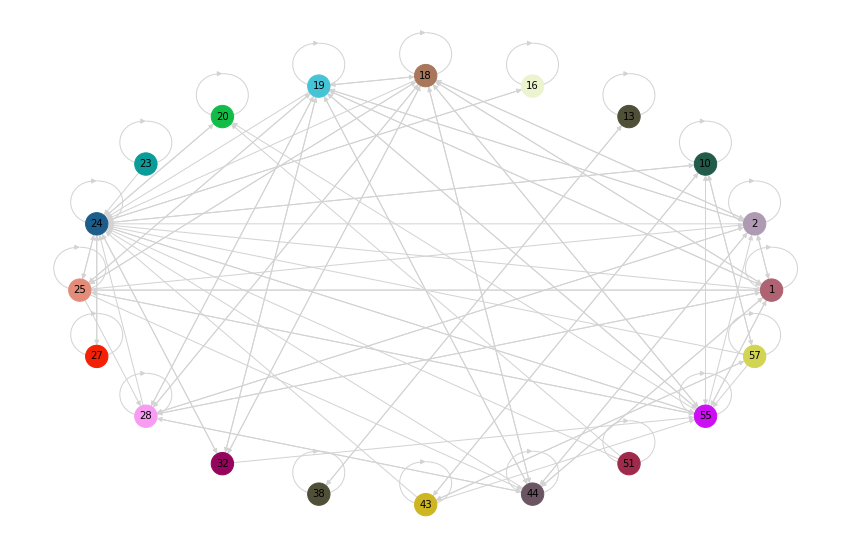

In [457]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw_networkx(gpotter,
                 pos=pos,
                 edge_color='lightgray',
                 node_size = 500,
                 with_labels=True,
                 #labels=etiquetas,
                 font_size=10, 
                 node_color=cmn_color
                 )

plt.box(False)
plt.show()

### Exemplo

Considere o dataset **Stack Overflow Tag Network**, uma rede de tags do ***Stack Overflow*** baseada em histórias dos desenvolvedores.

Link: https://www.kaggle.com/datasets/stackoverflow/stack-overflow-tag-network



In [458]:
df = pd.read_csv('../../data/stack_network/stack_network_links.csv')

In [459]:
df.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [460]:
G = nx.Graph()

In [461]:
with open('../../data/stack_network/stack_network_links.csv') as f:
  next(f)
  G = nx.parse_edgelist(f.readlines(), comments='/', delimiter=',', data=(('weight', float),))

In [462]:
list(G.nodes())[:5]

['azure', '.net', 'sql-server', 'asp.net', 'entity-framework']

In [463]:
list(G.edges.data('weight'))[:5]

[('azure', '.net', 20.933192346640457),
 ('azure', 'amazon-web-services', 21.30994959394633),
 ('azure', 'asp.net', 23.764072995058054),
 ('azure', 'asp.net-web-api', 21.585694763313093),
 ('azure', 'c#', 22.14448701181891)]

In [516]:
print(f"#nodes = {nx.number_of_nodes(G)}")
print(f"#edges = {nx.number_of_edges(G)}")

#nodes = 115
#edges = 245


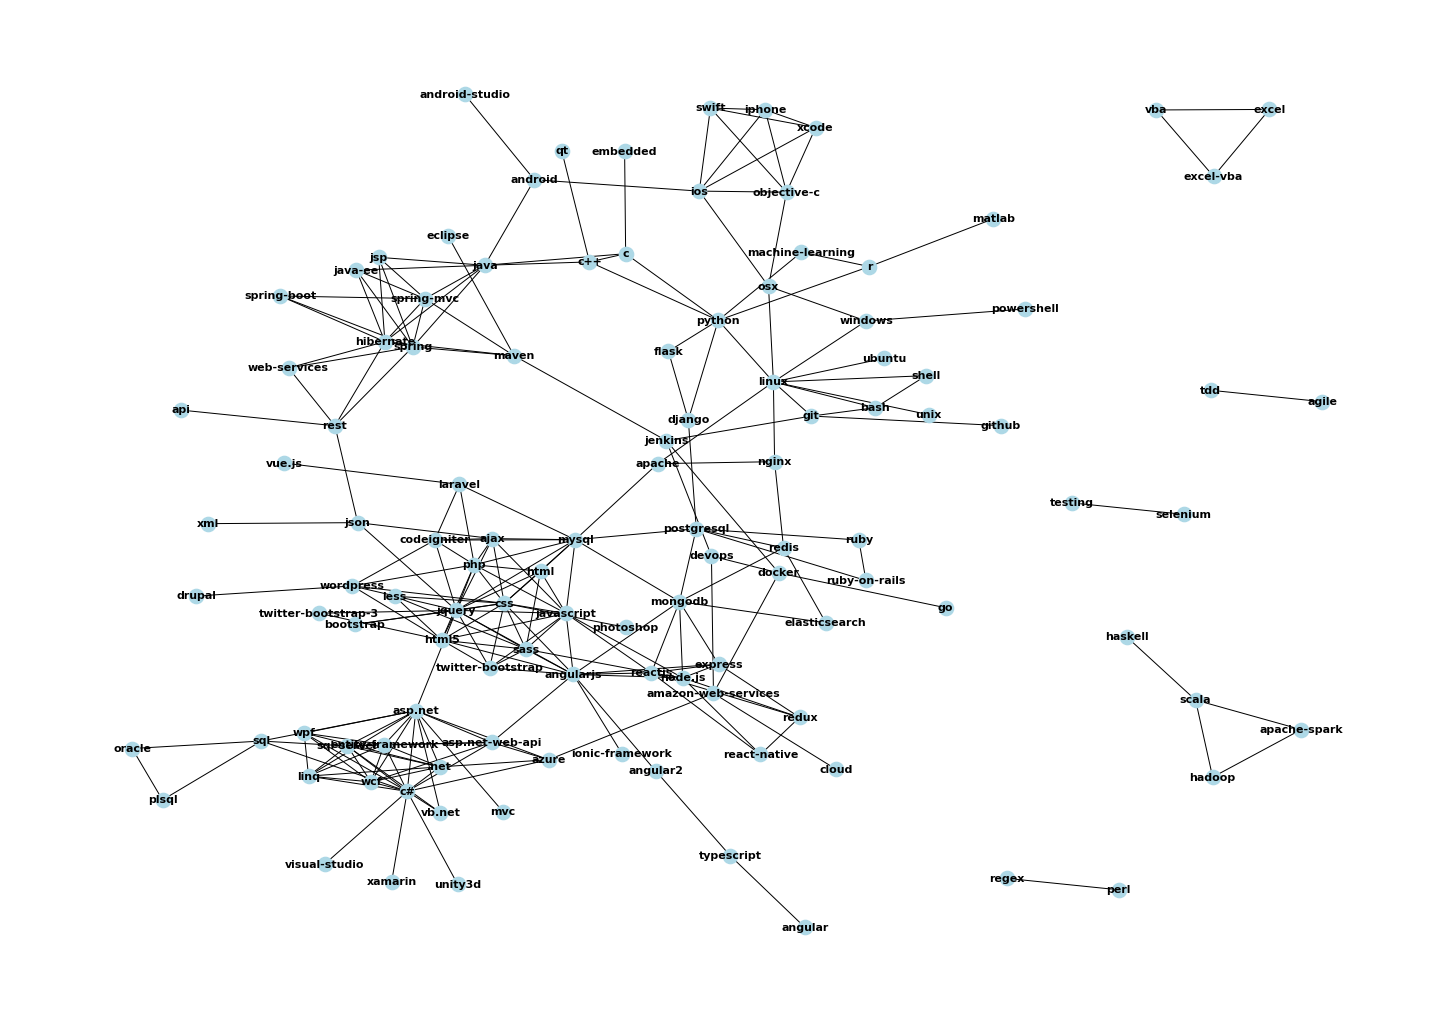

In [518]:
plt.figure(figsize=(20,14))

nx.draw(G, 
        pos = nx.nx_agraph.graphviz_layout(G),
        node_size=200, 
        node_color='lightblue', 
        linewidths=1.5,
        font_size=11, 
        font_weight='bold', 
        with_labels=True
    )

In [513]:
cmn_comm = cm.greedy_modularity_communities(G, weight='weight')
louvain_comm = cm.louvain_communities(G,weight='weight')

tam_louvain_comm = len(louvain_comm)
tam_cmn_comm = len(cmn_comm)

coef_louvain_comm = cm.modularity(G,louvain_comm)
coef_cmn_comm = cm.modularity(G,cmn_comm)

In [514]:
print(f"tam louvain comm = {len(louvain_comm)}")
print(f"tam cmn comm = {len(cmn_comm)}")

tam louvain comm = 14
tam cmn comm = 13


In [515]:
print(f"coef louvain mod = {coef_louvain_comm}")
print(f"coef cmn mod = {coef_cmn_comm}")

coef louvain mod = 0.7246397334443981
coef cmn mod = 0.7042232403165349


In [467]:
for it in cmn_comm:
    print(it)

frozenset({'html5', 'xml', 'laravel', 'less', 'angularjs', 'javascript', 'html', 'sass', 'css', 'photoshop', 'codeigniter', 'json', 'twitter-bootstrap-3', 'ajax', 'vue.js', 'wordpress', 'ionic-framework', 'jquery', 'twitter-bootstrap', 'bootstrap', 'drupal', 'php', 'mysql'})
frozenset({'asp.net-web-api', 'sql', 'c#', '.net', 'entity-framework', 'wpf', 'linq', 'azure', 'unity3d', 'oracle', 'vb.net', 'sql-server', 'asp.net', 'plsql', 'xamarin', 'visual-studio', 'mvc', 'wcf'})
frozenset({'api', 'spring-mvc', 'eclipse', 'hibernate', 'spring-boot', 'jsp', 'android-studio', 'java', 'maven', 'spring', 'java-ee', 'web-services', 'android', 'rest'})
frozenset({'bash', 'nginx', 'ubuntu', 'unix', 'linux', 'windows', 'apache', 'powershell', 'git', 'shell', 'github'})
frozenset({'node.js', 'react-native', 'elasticsearch', 'mongodb', 'reactjs', 'ruby', 'postgresql', 'redis', 'redux', 'express', 'ruby-on-rails'})
frozenset({'c++', 'python', 'machine-learning', 'qt', 'embedded', 'flask', 'django', 'ma

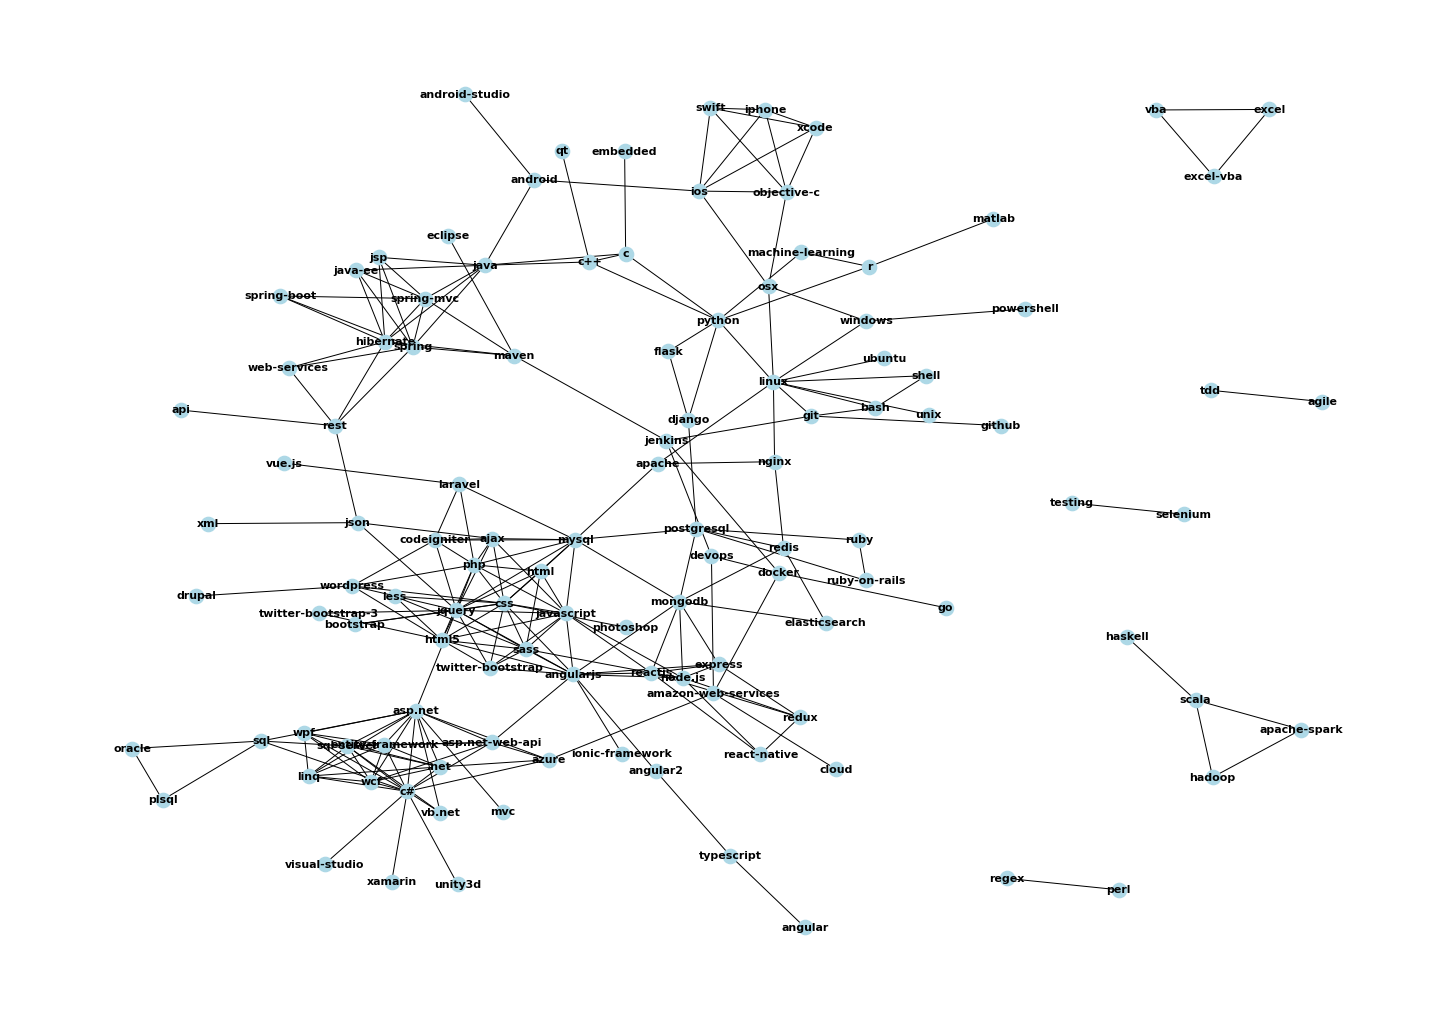

In [469]:
comm_dict = {}

for i in range(len(cmn_comm)):
  for node in list(cmn_comm[i]):
    comm_dict[node] = i

nx.set_node_attributes(G, comm_dict, name='group')

In [470]:
print(len(comm_dict))

115


In [471]:
set_id_comm = set(comm_dict.values())
list_id_comm = list(set_id_comm)

In [472]:
for id in list_id_comm:
    print(f"commmunity {id}:", end=" ")
    for key, value in comm_dict.items():
        if value == id:
            print(key, value, end=", ")
    print()

commmunity 0: html5 0, xml 0, laravel 0, less 0, angularjs 0, javascript 0, html 0, sass 0, css 0, photoshop 0, codeigniter 0, json 0, twitter-bootstrap-3 0, ajax 0, vue.js 0, wordpress 0, ionic-framework 0, jquery 0, twitter-bootstrap 0, bootstrap 0, drupal 0, php 0, mysql 0, 
commmunity 1: asp.net-web-api 1, sql 1, c# 1, .net 1, entity-framework 1, wpf 1, linq 1, azure 1, unity3d 1, oracle 1, vb.net 1, sql-server 1, asp.net 1, plsql 1, xamarin 1, visual-studio 1, mvc 1, wcf 1, 
commmunity 2: api 2, spring-mvc 2, eclipse 2, hibernate 2, spring-boot 2, jsp 2, android-studio 2, java 2, maven 2, spring 2, java-ee 2, web-services 2, android 2, rest 2, 
commmunity 3: bash 3, nginx 3, ubuntu 3, unix 3, linux 3, windows 3, apache 3, powershell 3, git 3, shell 3, github 3, 
commmunity 4: node.js 4, react-native 4, elasticsearch 4, mongodb 4, reactjs 4, ruby 4, postgresql 4, redis 4, redux 4, express 4, ruby-on-rails 4, 
commmunity 5: c++ 5, python 5, machine-learning 5, qt 5, embedded 5, flas

### Atividade

Encontre comunidades usando o algoritmo de **Louvain** e gere um gráfico mostrando o resultado obtido.

In [474]:
net = Network(notebook=True, cdn_resources='in_line')
_ = net.from_nx(G)
_ = net.show('community_cmn.html')

community_cmn.html


In [494]:
louvain_comm = cm.louvain_communities(G, weight='weight')
tam_louvain_comm = len(louvain_comm)
print(louvain_comm)

[{'agile', 'tdd'}, {'xcode', 'swift', 'iphone', 'android-studio', 'objective-c', 'osx', 'ios', 'powershell', 'android', 'windows'}, {'angular', 'typescript', 'angular2'}, {'bash', 'nginx', 'docker', 'ubuntu', 'unix', 'linux', 'jenkins', 'go', 'cloud', 'devops', 'apache', 'git', 'shell', 'github', 'amazon-web-services'}, {'scala', 'hadoop', 'haskell', 'apache-spark'}, {'spring-mvc', 'api', 'hibernate', 'qt', 'c', 'rest', 'eclipse', 'c++', 'spring-boot', 'java', 'maven', 'spring', 'web-services', 'java-ee', 'embedded', 'jsp'}, {'django', 'matlab', 'python', 'machine-learning', 'r', 'flask'}, {'excel-vba', 'excel', 'vba'}, {'node.js', 'react-native', 'elasticsearch', 'redux', 'mongodb', 'ruby', 'postgresql', 'redis', 'reactjs', 'express', 'ruby-on-rails'}, {'html5', 'xml', 'less', 'laravel', 'angularjs', 'html', 'javascript', 'sass', 'css', 'photoshop', 'codeigniter', 'json', 'twitter-bootstrap-3', 'ajax', 'vue.js', 'wordpress', 'ionic-framework', 'jquery', 'twitter-bootstrap', 'bootstrap

In [496]:
print(f"tam louvain comm = {tam_louvain_comm}")

tam louvain comm = 13


In [497]:
coef_louvain_comm = cm.modularity(G,louvain_comm)
print(f"coef louvain commm = {coef_louvain_comm}")

coef louvain commm = 0.7246563931695127


In [498]:
list_color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(tam_louvain_comm)]
print(len(list_color))

13


In [501]:
louvain_color = []
for no in gpotter.nodes():
    for k in range(len(louvain_comm)):
        if (no in louvain_comm[k]):
            louvain_color.append(list_color[k])

In [ ]:
plt.figure(figsize=(20,14))

nx.draw(G, 
        pos = nx.nx_agraph.graphviz_layout(G),
        node_size=200, 
        #node_color='lightblue', 
        linewidths=1.5,
        font_size=11,
        font_weight='bold',
        with_labels=True,
        node_color=list_color
        )

SyntaxError: keyword argument repeated: node_color (2194062042.py, line 11)

<Figure size 1440x1008 with 0 Axes>

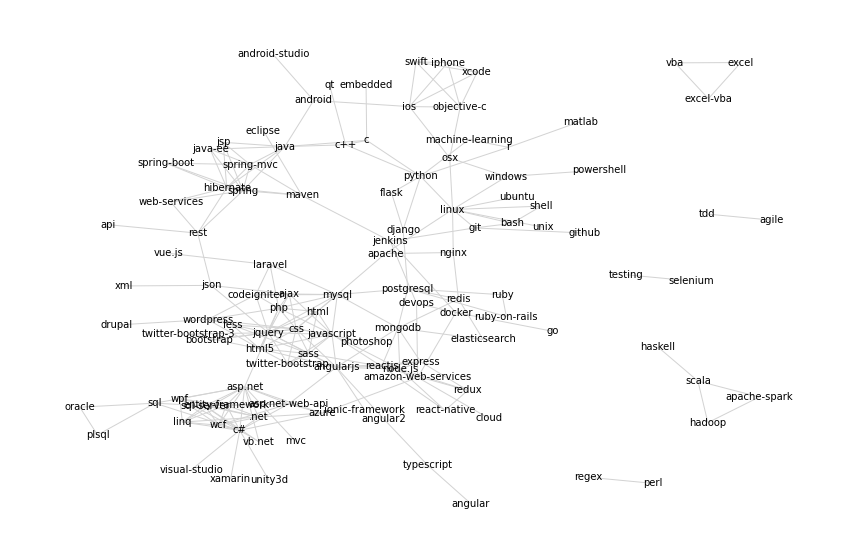

In [506]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw_networkx(G,
                 pos=nx.nx_agraph.graphviz_layout(G),
                 edge_color='lightgray',
                 node_size = 200,
                 with_labels=True,
                 #labels=etiquetas,
                 font_size=10, 
                 node_color=louvain_color
                 )

plt.box(False)
plt.show()

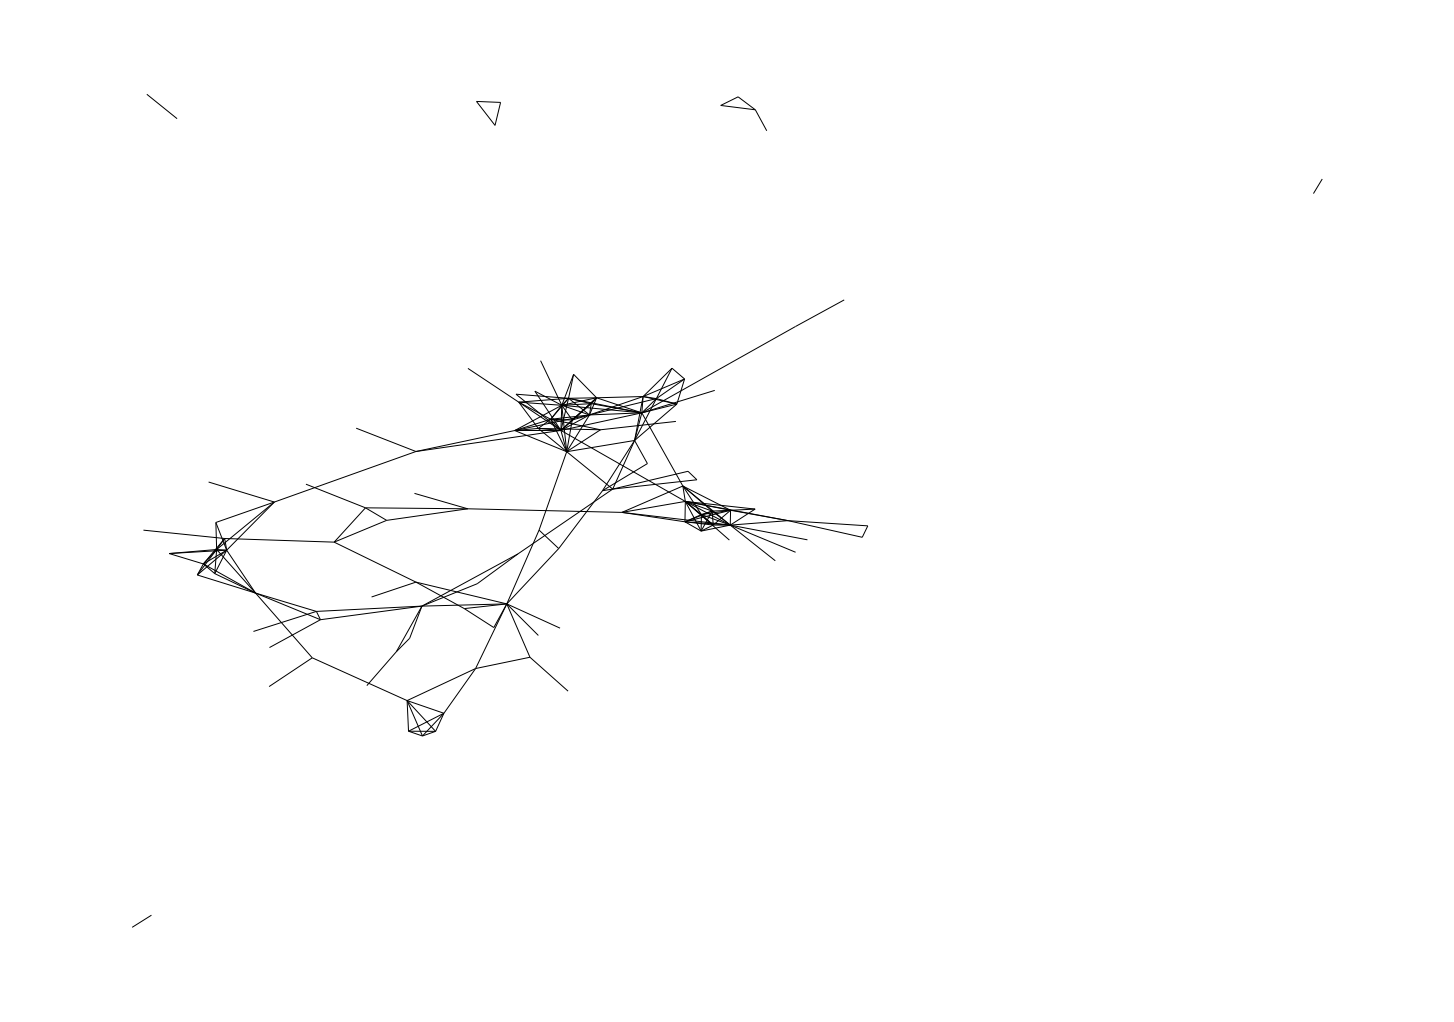

In [ ]:
plt.figure(figsize=(20,14))

nx.draw(G, 
        pos = nx.nx_agraph.graphviz_layout(G),
        node_size=200, 
        node_color=louvain_color,
        linewidths=1.5,
        font_size=11, 
        font_weight='bold', 
        #with_labels=True
    )